In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg
import scipy.integrate as integrate
import math
from scipy.stats.distributions import norm
from pyDOE import *
%matplotlib inline

In [2]:
def ADRSource(Lx, Nx, Source, omega, v, kappa):
    #Solves the diffusion equation with Generalized Source
    A = sparse.dia_matrix((Nx,Nx),dtype="complex")
    dx = Lx/Nx
    i2dx2 = 1.0/(dx*dx)
    #fill diagonal of A
    A.setdiag(2*i2dx2*omega + np.sign(v)*v/dx + kappa)
    #fill off diagonals of A
    A.setdiag(-i2dx2*omega[1:Nx] + 
              0.5*(1-np.sign(v[1:Nx]))*v[1:Nx]/dx,1)
    A.setdiag(-i2dx2*omega[0:(Nx-1)] - 
              0.5*(np.sign(v[0:(Nx-1)])+1)*v[0:(Nx-1)]/dx,-1)
    #solve A x = Source
    Solution = linalg.spsolve(A,Source)
    Q = integrate.trapz(Solution*kappa,dx=dx)
    return Solution, Q

[ 10.  10.  10. ...,  10.  10.  10.]
(52.3902529277+0j)


/Users/ryanmcclarren/anaconda/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:102: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/Users/ryanmcclarren/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


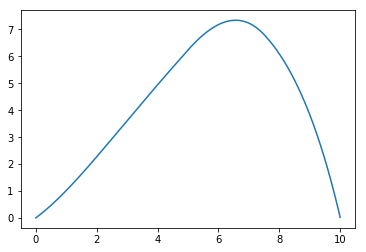

In [3]:
Lx = 10
Nx = 2000
dx = Lx/Nx
Source_func = lambda x, q:  q*x*(10-x)
kappa_func = lambda x, kappal, kappah: kappah + (kappal-kappah)*(x>5)*(x<7.5)
v_func = lambda x,v: v*np.ones(x.size)
omega_func = lambda x,omega: omega*np.ones(x.size)

#nominal values

import csv

xs = np.linspace(dx/2,Lx-dx/2,Nx)
source = Source_func(xs, 1)
kappa = kappa_func(xs, 0.1, 2)

omega_nom = 20
omega_var = 0.3195214
v_nom = 10
v_var = 0.0723493
kappal_nom = 0.1
kappal_var = 8.511570e-6
kappah_nom = 2
kappah_var = 0.002778142
q_nom = 1
q_var = 7.062353e-4
vs = v_func(xs, v_nom)
print(vs)
sol,Q = ADRSource(Lx, Nx, source, omega_func(xs, omega_nom), vs, kappa)
print(Q)
plt.plot(xs,sol)
plt.show()

In [4]:
#v sensitivity
delta = 1e-6
vs_pert = v_func(xs, v_nom*(1+delta))
sol,Q_new = ADRSource(Lx, Nx, source, omega_func(xs, omega_nom), vs_pert, kappa)
sens_v = (Q_new - Q)/(v_nom*delta)
print("v sensitivity is", sens_v)
sens_v = (Q_new - Q)/(v_nom*delta)
scaled_v = sens_v*v_nom
print("v scaled sensitivity is", scaled_v)
index_v = math.sqrt(v_var)*sens_v
print("v scaled sensitivity is", index_v)
delta = 1e-8
vs_pert = v_func(xs, v_nom*(1+delta*1j))
solv,Q_new = ADRSource(Lx, Nx, source, omega_func(xs, omega_nom), vs_pert, kappa)
print(np.imag(Q_new)/(delta*v_nom))

v sensitivity is (-1.74063875491+0j)
v scaled sensitivity is (-17.4063875491+0j)
v scaled sensitivity is (-0.468193969501+0j)
-1.74049265503


/Users/ryanmcclarren/anaconda/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:102: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [5]:
#omega sensitivity
sol,Q_new = ADRSource(Lx, Nx, source, omega_func(xs, omega_nom*(1+delta)), vs, kappa)
sens_omega = (Q_new - Q)/(omega_nom*delta)
print("omega sensitivity is", sens_omega)
scaled_v = sens_omega*omega_nom
print("omega scaled sensitivity is", scaled_v)
index_v = math.sqrt(omega_var)*sens_omega
print("omega scaled sensitivity is", index_v)

omega sensitivity is (-0.970393472244+0j)
omega scaled sensitivity is (-19.4078694449+0j)
omega scaled sensitivity is (-0.548526787828+0j)


/Users/ryanmcclarren/anaconda/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:102: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [6]:
#kappal sensitivity
sol,Q_new = ADRSource(Lx, Nx, source, omega_func(xs, omega_nom), vs, kappa_func(xs, kappal_nom*(1+delta), 2))
sens_kappal = (Q_new - Q)/(kappal_nom*delta)
print("omega sensitivity is", sens_kappal)
scaled_v = sens_kappal*kappal_nom
print("omega scaled sensitivity is", scaled_v)
index_v = math.sqrt(kappal_var)*sens_kappal
print("omega scaled sensitivity is", index_v)

omega sensitivity is (13.1587256647+0j)
omega scaled sensitivity is (1.31587256647+0j)
omega scaled sensitivity is (0.0383900493468+0j)


/Users/ryanmcclarren/anaconda/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:102: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [7]:
#kappah sensitivity
sol,Q_new = ADRSource(Lx, Nx, source, omega_func(xs, omega_nom), vs, kappa_func(xs, kappal_nom, kappah_nom*(1+delta)))
sens_kappah = (Q_new - Q)/(kappah_nom*delta)
print("omega sensitivity is", sens_kappah)
scaled_v = sens_kappah*kappah_nom
print("omega scaled sensitivity is", scaled_v)
index_v = math.sqrt(kappah_var)*sens_kappah
print("omega scaled sensitivity is", index_v)

omega sensitivity is (17.7516305655+0j)
omega scaled sensitivity is (35.503261131+0j)
omega scaled sensitivity is (0.935654414952+0j)


/Users/ryanmcclarren/anaconda/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:102: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [8]:
#q sensitivity
sol,Q_new = ADRSource(Lx, Nx, Source_func(xs, q_nom*(1+delta)), omega_func(xs, omega_nom), vs,
                      kappa_func(xs, kappal_nom, kappah_nom))
sens_q = (Q_new - Q)/(q_nom*delta)
print("omega sensitivity is", sens_q)
scaled_v = sens_q*q_nom
print("omega scaled sensitivity is", scaled_v)
index_v = math.sqrt(q_var)*sens_q
print("omega scaled sensitivity is", index_v)

sens_vec = np.array([sens_v, sens_omega, sens_kappal, sens_kappah, sens_q])

omega sensitivity is (52.3902556893+0j)
omega scaled sensitivity is (52.3902556893+0j)
omega scaled sensitivity is (1.39227565311+0j)


/Users/ryanmcclarren/anaconda/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:102: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Now get multivariate samples

In [9]:
means = [v_nom, omega_nom, kappal_nom, kappah_nom, q_nom]
varmat = np.zeros((5,5))
#fill in diagonal
corrmat = np.ones((5,5))
corrmat[0,:] = (1,.1,-0.05,0,0)
corrmat[1,:] = (.1,1,-.4,.3,.5)
corrmat[2,:] = (-0.05,-.4,1,.2,0)
corrmat[3,:] = (0,.3,0.2,1,-.1)
corrmat[4,:] = (0,.5,0,-.1,1)
print(corrmat-corrmat.transpose())
print(corrmat)
        

varmat[np.diag_indices(5)] = [v_var, omega_var, kappal_var, kappah_var, q_var]
for i in range(5):
    for j in range(5):
        varmat[i,j] = math.sqrt(varmat[i,i])*math.sqrt(varmat[j,j])*corrmat[i,j]
print(varmat)
print(varmat-varmat.transpose())
print(np.linalg.eig(varmat))

samps = 4*10**4
test = np.random.multivariate_normal(means, varmat, samps)


import tabulate
print(tabulate.tabulate(corrmat, tablefmt="latex", floatfmt=".2f"))

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 1.    0.1  -0.05  0.    0.  ]
 [ 0.1   1.   -0.4   0.3   0.5 ]
 [-0.05 -0.4   1.    0.2   0.  ]
 [ 0.    0.3   0.2   1.   -0.1 ]
 [ 0.    0.5   0.   -0.1   1.  ]]
[[  7.23493000e-02   1.52043249e-02  -3.92366580e-05   0.00000000e+00
    0.00000000e+00]
 [  1.52043249e-02   3.19521400e-01  -6.59651879e-04   8.93816670e-03
    7.51094687e-03]
 [ -3.92366580e-05  -6.59651879e-04   8.51157000e-06   3.07547395e-05
    0.00000000e+00]
 [  0.00000000e+00   8.93816670e-03   3.07547395e-05   2.77814200e-03
   -1.40072194e-04]
 [  0.00000000e+00   7.51094687e-03   0.00000000e+00  -1.40072194e-04
    7.06235300e-04]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
(array([  3.20880078e-01,   7.14248146e-02,   2.58516363e-03,
         4.68396801e-04,   5.13602871e-06]), array([[ -6.10221850e-02,  -9.98104846e-01, 

In [10]:
Qs = np.zeros(samps)
for i in range(samps):
    sol,Qs[i] = ADRSource(Lx, Nx, Source_func(xs, test[i,4]), omega_func(xs, test[i,1]), v_func(xs, test[i,0]),
                          kappa_func(xs, test[i,2], test[i,3]))

/Users/ryanmcclarren/anaconda/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:102: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/Users/ryanmcclarren/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


52.3726276674 2.08572720632
(2.08763962366+0j)


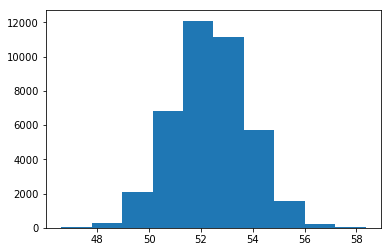

In [12]:

print(np.mean(Qs),np.var(Qs))
print( np.dot(sens_vec.transpose(),np.dot(varmat,sens_vec)))
plt.hist(Qs)
plt.show()

np.savetxt('first_order_sens_mc.csv', np.real(Qs), delimiter=',')

# Random Process

In [439]:
mean_kappa = kappa_func(xs, kappal_nom, kappah_nom)
exp_cov = lambda x,y: 0.025*np.exp(-0.1*np.abs(x-y))
kappa_cov = np.zeros((xs.size,xs.size))
for i in range(xs.size):
    for j in range(xs.size):
        kappa_cov[i,j] = exp_cov(dx*i,dx*j)
sol,Q = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), v_func(xs, v_nom), mean_kappa)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:101: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [448]:
tests = 2000
kappa1 = np.random.multivariate_normal(mean_kappa, kappa_cov,tests)
Qs = np.zeros(tests)
for i in range(tests):
    sol,Qs[i] = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), v_func(xs, v_nom), kappa1[i,:])
print(Q, np.mean(Qs),np.var(Qs))

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:101: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:5: ComplexWarning: Casting complex values to real discards the imaginary part


(52.3903954692+0j) 52.2452413705 19.6625013594


In [504]:
sens = np.zeros(Nx)
sens2 = 0*sens
mean_kappa = kappa_func(xs, kappal_nom, kappah_nom)
Q_nom = Q
delta = 1e-4
print(delta)
for i in range(Nx):
    pert = np.ones(Nx)
    pert[i] += (delta)
    sol, Qnew = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), v_func(xs, v_nom),
                          mean_kappa*pert)
    sens[i] = (Qnew - Q_nom)/(delta*mean_kappa[i])
    

delta = 1e-2
print(delta)
for i in range(Nx):
    pert = np.ones(Nx)
    pert[i] += (delta)
    sol, Qnew = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), v_func(xs, v_nom),
                          mean_kappa*pert)
    pert = np.ones(Nx)
    pert[i] -= (delta)
    sol, Qnewback = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), v_func(xs, v_nom),
                          mean_kappa*pert)
    sens2[i] = (Qnewback -2*Q_nom + Qnew)/((delta*mean_kappa[i])**2)


0.0001


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:101: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:12: ComplexWarning: Casting complex values to real discards the imaginary part


0.01


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


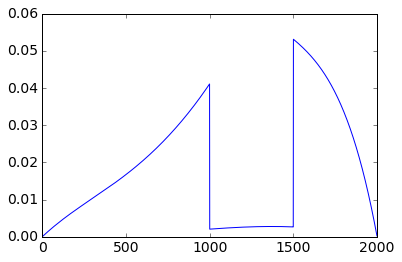

18.7097338237


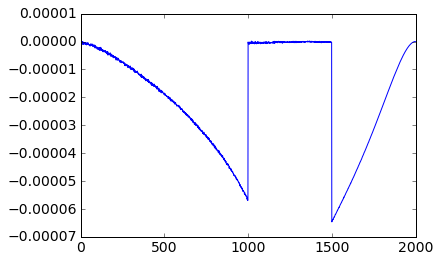

In [505]:
plt.plot(sens*mean_kappa)
plt.show()
print(np.dot(sens.transpose(), np.dot(kappa_cov,sens)))
np.savetxt("sens_proc.csv", sens*mean_kappa, delimiter=",")

plt.plot(sens2*mean_kappa*mean_kappa)
plt.show()

np.savetxt("sens2_proc.csv", sens2*mean_kappa*mean_kappa, delimiter=",")

[[ 0.38482596  0.77204982  0.6860094  ...,  0.10090337  0.97618288
   0.9242496 ]
 [ 0.6702265   0.05207229  0.09460753 ...,  0.38827987  0.56855719
   0.15005707]
 [ 0.56210783  0.9468378   0.82066556 ...,  0.28731862  0.84823831
   0.38677273]
 ..., 
 [ 0.00916686  0.15744211  0.15152345 ...,  0.75553986  0.06572058
   0.89854934]
 [ 0.25173772  0.40389482  0.93010852 ...,  0.04007723  0.15344002
   0.20425457]
 [ 0.45870109  0.66384987  0.51144612 ...,  0.61726393  0.71677034
   0.76399074]]
(52.3903954692+0j) 52.4034678973 0.357603978983


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:101: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


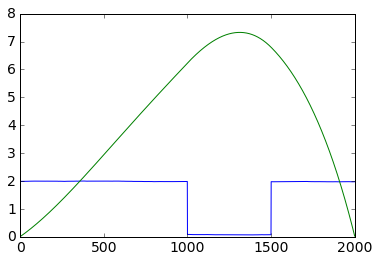

In [494]:
L = np.linalg.cholesky(kappa_cov)
tests = 10
lhd = lhs(2000, samples=tests)
print(lhd)
Zs = norm.ppf(lhd)
#print(Zs)
proc_vals = np.zeros((tests,2000))
for i in range(tests):
    proc_vals[i,:] = mean_kappa + 0.1*np.dot(L,Zs[i,:])
plt.plot(proc_vals[tests//2,:])
kappa1 = proc_vals*1.0
Qs = np.zeros(tests)
for i in range(tests):
    sol,Qs[i] = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), v_func(xs, v_nom), kappa1[i,:])
print(Q, np.mean(Qs),np.var(Qs))
plt.plot(sol)
#save kappas
np.savetxt("kappas.csv",(kappa1-mean_kappa)/mean_kappa, delimiter=",")
np.savetxt("procQ.csv",np.real(Qs-Q), delimiter=",")

[[ 0.66939613  0.22956547  0.35397257 ...,  0.68510066  0.24730693
   0.26965918]
 [ 0.97615473  0.98610496  0.77446967 ...,  0.10434075  0.32704234
   0.36651336]
 [ 0.38327298  0.14654953  0.42530568 ...,  0.29137707  0.52493825
   0.64682412]
 ..., 
 [ 0.74727481  0.5220169   0.20621756 ...,  0.81351784  0.53889494
   0.57116908]
 [ 0.59359529  0.20071065  0.15517467 ...,  0.91467819  0.48882459
   0.1964361 ]
 [ 0.08575831  0.73377392  0.70877266 ...,  0.55216732  0.8008367
   0.30236446]]


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:101: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:14: ComplexWarning: Casting complex values to real discards the imaginary part


(52.3903954692+0j) 52.3854883831 0.187701658477


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


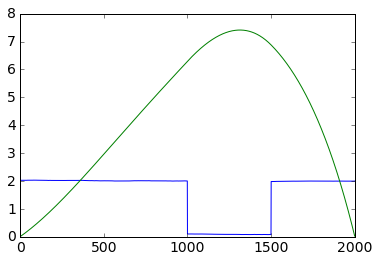

In [496]:
L = np.linalg.cholesky(kappa_cov)
tests = 100
lhd = lhs(2000, samples=tests)
print(lhd)
Zs = norm.ppf(lhd)
#print(Zs)
proc_vals = np.zeros((tests,2000))
for i in range(tests):
    proc_vals[i,:] = mean_kappa + 0.1*np.dot(L,Zs[i,:])
plt.plot(proc_vals[tests//2,:])
kappa1 = proc_vals*1.0
Qs = np.zeros(tests)
for i in range(tests):
    sol,Qs[i] = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), v_func(xs, v_nom), kappa1[i,:])
print(Q, np.mean(Qs),np.var(Qs))
plt.plot(sol)
#save kappas
np.savetxt("kappas100.csv",(kappa1-mean_kappa)/mean_kappa, delimiter=",")
np.savetxt("procQ100.csv",np.real(Qs-Q), delimiter=",")

In [165]:
#make output
output = np.vstack([xs,kappa1[0,:],kappa1[1,:],kappa1[2,:]]).transpose()
np.savetxt('three_samp.csv', output, delimiter=',')
output = np.vstack([xs,sens]).transpose()
np.savetxt('fd_adr_samp.csv', output, delimiter=',')

In [139]:
pert = np.ones(Nx,dtype="complex")
pert[1000] += (delta*1j)
sol, Qnew = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), v_func(xs, v_nom),
                          mean_kappa*pert)
print(np.imag(Qnew)/delta)

0.00311974218168


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/sparse/dia.py:275: ComplexWarning: Casting complex values to real discards the imaginary part
  data[-1, min_index:max_index] = values
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:101: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [211]:
sens_c = np.zeros(Nx)
Q_nom = Q
delta_c = 1e-12
print(delta_c)
for i in range(Nx):
    pert = np.ones(Nx,dtype="complex")
    pert[i] += (delta_c*1j)
    sol, Qnew = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), v_func(xs, v_nom),
                          mean_kappa*pert)
    sens_c[i] = np.imag(Qnew)/(delta_c*mean_kappa[i])



1e-12


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:101: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


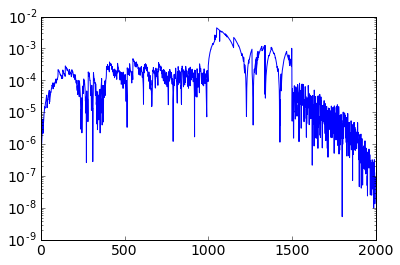

18.7100506204


In [212]:
plt.semilogy(np.abs(sens_c - sens))
plt.show()
print(np.dot(sens_c.transpose(), np.dot(kappa_cov,sens_c)))

# Comparison of approaches

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:101: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:25: ComplexWarning: Casting complex values to real discards the imaginary part


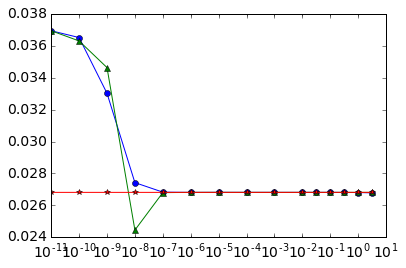

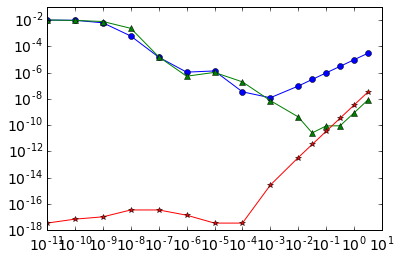

In [228]:
deltas = 10.**np.array([1.5,1,0.5,0,-0.5,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10])
sens_FD = np.zeros(deltas.size)
sens_CD = np.zeros(deltas.size)
sens_CS = np.zeros(deltas.size)
Q_nom = Q
count = 0
for delta in deltas:
    i = 1250
    pert = np.ones(Nx)
    pert[i] += (delta)
    sol, Qnew = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), v_func(xs, v_nom),
                              mean_kappa*pert)
    sens_FD[count] = (Qnew - Q_nom)/(delta*mean_kappa[i])
    
    
    pert = np.ones(Nx)
    pert[i] += (delta/2)
    sol, Qfor = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), v_func(xs, v_nom),
                              mean_kappa*pert)
    
    pert = np.ones(Nx)
    pert[i] += (-delta/2)
    sol, Qback = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), v_func(xs, v_nom),
                              mean_kappa*pert)
    sens_CD[count] = (Qfor - Qback)/(delta*mean_kappa[i])
    
    
    pert = np.ones(Nx,dtype="complex")
    pert[i] += (delta*1j)
    sol, Qnew = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), v_func(xs, v_nom),
                          mean_kappa*pert)
    sens_CS[count] = np.imag(Qnew)/(delta*mean_kappa[i])
    count += 1

delta_c = 1e-12
pert = np.ones(Nx,dtype="complex")
pert[i] += (delta_c*1j)
sol, Qnew = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), v_func(xs, v_nom),
                      mean_kappa*pert)
exact = np.imag(Qnew)/(delta_c*mean_kappa[i])

plt.semilogx(deltas*mean_kappa[i], sens_FD,'o-')
plt.plot(deltas*mean_kappa[i], sens_CD,'^-')
plt.plot(deltas*mean_kappa[i], sens_CS,'*-')
plt.show()

plt.loglog(deltas*mean_kappa[i], np.abs(exact-sens_FD),'o-')
plt.loglog(deltas*mean_kappa[i], np.abs(exact-sens_CD),'^-')
plt.loglog(deltas*mean_kappa[i], np.abs(exact-sens_CS),"*-")
plt.show()

In [229]:
print(sens_FD,sens_CS)
#make output
output = np.vstack([deltas,sens_FD,sens_CD,sens_CS]).transpose()
np.savetxt('sens_adr.csv', output, delimiter=',')
output = np.vstack([deltas,np.abs(exact-sens_FD),np.abs(exact-sens_CD),np.abs(exact-sens_CS)]).transpose()
np.savetxt('sens_adr_abs_error.csv', output, delimiter=',')

[ 0.02678069  0.02680124  0.02680775  0.02680981  0.02681046  0.02681067
  0.02681075  0.0268108   0.02681211  0.02680967  0.02682583  0.02742198
  0.03302603  0.0365219   0.03694822] [ 0.02681073  0.02681076  0.02681076  0.02681076  0.02681076  0.02681076
  0.02681076  0.02681076  0.02681076  0.02681076  0.02681076  0.02681076
  0.02681076  0.02681076  0.02681076]


# Second-Order

In [342]:
#second-derivatives
xs = np.linspace(dx/2,Lx-dx/2,Nx)
source = Source_func(xs, 1)
kappa = kappa_func(xs, 0.1, 2)

omega_nom = 20
omega_var = 0.3195214
v_nom = 10
v_var = 0.0723493
kappal_nom = 0.1
kappal_var = 8.511570e-6
kappah_nom = 2
kappah_var = 0.002778142
q_nom = 1
q_var = 7.062353e-4
vs = v_func(xs, v_nom)
delta = 1e-6
sol,q_center = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), 
                                 vs,                       
                                 kappa_func(xs, kappal_nom, kappah_nom))  
sens_q2 = np.zeros(5)
for i in range(5):
    deltas = np.zeros(5)
    deltas[i] = 1.0*delta
        
    sol,forward_pert = ADRSource(Lx, Nx, Source_func(xs, q_nom*(1+deltas[4])), omega_func(xs, omega_nom*(1+deltas[1])), 
                                 vs*(1+deltas[0]),                       
                                 kappa_func(xs, kappal_nom*(1+deltas[2]), kappah_nom*(1+deltas[3])))    
    sol,backward_pert = ADRSource(Lx, Nx, Source_func(xs, q_nom*(1-deltas[4])), omega_func(xs, omega_nom*(1-deltas[1])), 
                                 vs*(1-deltas[0]),                       
                                 kappa_func(xs, kappal_nom*(1-deltas[2]), kappah_nom*(1-deltas[3])))
    noms = np.array((v_nom,omega_nom,kappal_nom, kappah_nom, q_nom))
    sens_q2[i] = (forward_pert - 2*q_center + backward_pert)/(np.sum(noms*deltas))**2
print(sens_q2*noms*noms)

[ -4.73292516e+01  -6.79065693e+01   1.05122666e+03  -9.05657771e+01
   1.13686838e-01]


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:101: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:33: ComplexWarning: Casting complex values to real discards the imaginary part


In [136]:
#cross-derivatives
xs = np.linspace(dx/2,Lx-dx/2,Nx)
source = Source_func(xs, 1)
kappa = kappa_func(xs, 0.1, 2)

omega_nom = 20
omega_var = 0.3195214
v_nom = 10
v_var = 0.0723493
kappal_nom = 0.1
kappal_var = 8.511570e-6
kappah_nom = 2
kappah_var = 0.002778142
q_nom = 1
q_var = 7.062353e-4
vs = v_func(xs, v_nom)
delta = 1e-4
sol,q_center = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), 
                                 vs,                       
                                 kappa_func(xs, kappal_nom, kappah_nom))  
sens_q2 = np.zeros((5,5),dtype="float")
count = 0
for i in range(5):
    for j in range(5):
        deltas = np.zeros(5)
        deltas2 = np.zeros(5)
        deltas[i] = 1.0*delta
        deltas2[j] = 1.0*delta
        
        if (i==j):
            sol,forward_pert = ADRSource(Lx, Nx, Source_func(xs, q_nom*(1+deltas[4])), omega_func(xs, omega_nom*(1+deltas[1])), 
                                 vs*(1+deltas[0]),                       
                                 kappa_func(xs, kappal_nom*(1+deltas[2]), kappah_nom*(1+deltas[3])))    
            sol,backward_pert = ADRSource(Lx, Nx, Source_func(xs, q_nom*(1-deltas[4])), omega_func(xs, omega_nom*(1-deltas[1])), 
                                         vs*(1-deltas[0]),                       
                                         kappa_func(xs, kappal_nom*(1-deltas[2]), kappah_nom*(1-deltas[3])))
            noms = np.array((v_nom,omega_nom,kappal_nom, kappah_nom, q_nom))
            inds = np.zeros(5)
            inds[i] = 1
            sens_q2[i,j] = (forward_pert - 2*q_center + backward_pert)/(np.sum(noms*deltas))**2 * np.sum(inds*noms)**2
        else:
            sol,pp = ADRSource(Lx, Nx, Source_func(xs, q_nom*(1+deltas[4]))*(1+deltas2[4]), 
                               omega_func(xs, omega_nom*(1+deltas[1])*(1+deltas2[1])), 
                               vs*(1+deltas[0])*(1+deltas2[0]),                       
                               kappa_func(xs, kappal_nom*(1+deltas[2])*(1+deltas2[2]), 
                                          kappah_nom*(1+deltas[3])*(1+deltas2[3])))    
            sol,pm = ADRSource(Lx, Nx, Source_func(xs, q_nom*(1+deltas[4]))*(1-deltas2[4]), 
                               omega_func(xs, omega_nom*(1+deltas[1])*(1-deltas2[1])), 
                               vs*(1+deltas[0])*(1-deltas2[0]),                       
                               kappa_func(xs, kappal_nom*(1+deltas[2])*(1-deltas2[2]), 
                                          kappah_nom*(1+deltas[3])*(1-deltas2[3])))    
            sol,mm = ADRSource(Lx, Nx, Source_func(xs, q_nom*(1-deltas[4]))*(1-deltas2[4]), 
                               omega_func(xs, omega_nom*(1-deltas[1])*(1-deltas2[1])), 
                               vs*(1-deltas[0])*(1-deltas2[0]),                       
                               kappa_func(xs, kappal_nom*(1-deltas[2])*(1-deltas2[2]), 
                                          kappah_nom*(1-deltas[3])*(1-deltas2[3]))) 
            sol,mp = ADRSource(Lx, Nx, Source_func(xs, q_nom*(1-deltas[4]))*(1+deltas2[4]), 
                               omega_func(xs, omega_nom*(1-deltas[1])*(1+deltas2[1])), 
                               vs*(1-deltas[0])*(1+deltas2[0]),                       
                               kappa_func(xs, kappal_nom*(1-deltas[2])*(1+deltas2[2]), 
                                          kappah_nom*(1-deltas[3])*(1+deltas2[3]))) 

            noms = np.array((v_nom,omega_nom,kappal_nom, kappah_nom, q_nom))
            inds = np.zeros(5)
            inds[i] = 1
            inds2 = np.zeros(5)
            inds2[j] = 1
            sens_q2[i,j] = (pp+mm-mp-pm)/(4*np.sum(noms*deltas)*np.sum(noms*deltas2)) * np.sum(inds*noms)*np.sum(inds2*noms)
        count += 1
print(sens_q2)
np.savetxt('sen2sadrmat.csv', np.real(sens_q2), delimiter=',')

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:96: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:68: ComplexWarning: Casting complex values to real discards the imaginary part


[[  3.55503929e+00   1.93842272e+01  -1.37971057e-01  -5.40357465e+00
   -1.74049305e+01]
 [  1.93842272e+01   9.36436493e+00  -4.70918060e-01  -8.88527261e+00
   -1.94040378e+01]
 [ -1.37971057e-01  -4.70918060e-01   7.08268999e-02  -6.43217568e-01
    1.28627899e+00]
 [ -5.40357465e+00  -8.88527261e+00  -6.43217568e-01  -2.06039637e+01
    3.55226938e+01]
 [ -1.74049307e+01  -1.94040375e+01   1.28627899e+00   3.55226938e+01
   -7.10542736e-06]]


In [321]:
import tabulate
print(tabulate.tabulate(sens_q2, tablefmt="latex", floatfmt=".2f"))

\begin{tabular}{rrrrr}
\hline
   3.56 &  19.38 & -0.14 &  -5.40 & -17.40 \\
  19.38 &   9.36 & -0.47 &  -8.89 & -19.40 \\
  -0.14 &  -0.47 &  0.07 &  -0.64 &   1.29 \\
  -5.40 &  -8.89 & -0.64 & -20.60 &  35.52 \\
 -17.40 & -19.40 &  1.29 &  35.52 &  -0.00 \\
\hline
\end{tabular}


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:101: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:11: ComplexWarning: Casting complex values to real discards the imaginary part


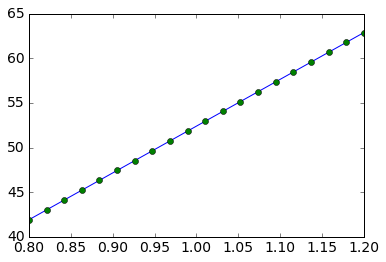

In [324]:
pert = np.linspace(-2,2,1000)*1e-1
plt.plot(1+pert, q_center + pert*52.390 + pert**2*sens_q2[4,4])
#run some examples
runs= 20
new_pert = np.linspace(-2,2,runs)*1e-1
vals = np.zeros(runs)
for i in range(runs):
    sol,q_new = ADRSource(Lx, Nx, Source_func(xs, q_nom+new_pert[i]), omega_func(xs, omega_nom), 
                                 vs,                       
                                 kappa_func(xs, kappal_nom, kappah_nom)) 
    vals[i] = q_new
plt.plot(1+new_pert,vals,"o")
plt.show()
#make output
output = np.vstack([new_pert,vals,q_center + new_pert*52.390 + new_pert**2*sens_q2[4,4]/2,q_center + new_pert*52.390]).transpose()
np.savetxt('sens_adr2_q.csv', np.real(output), delimiter=',')


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:101: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:12: ComplexWarning: Casting complex values to real discards the imaginary part


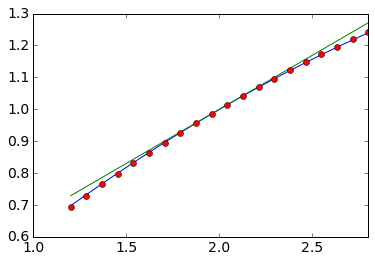

In [325]:
pert = np.linspace(-2,2,1000)*4e-1
plt.plot(2+pert, (q_center + pert*17.761 + .5*pert**2*sens_q2[3,3]/4)/q_center)
plt.plot(2+pert, (q_center + pert*17.761 + 0*pert**2*sens_q2[3,3]/4)/q_center)
#run some examples
runs= 20
new_pert = np.linspace(-2,2,runs)*4e-1
vals = np.zeros(runs)
for i in range(runs):
    sol,q_new = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), 
                                 vs,                       
                                 kappa_func(xs, kappal_nom, kappah_nom+new_pert[i])) 
    vals[i] = q_new
plt.plot(2+new_pert,vals/q_center,"o")
plt.show()
#make output
output = np.vstack([new_pert,vals,q_center + new_pert*17.761 + 0.5*new_pert**2*sens_q2[3,3]/4,q_center + new_pert*17.761]).transpose()
np.savetxt('sens_adr2_kappah.csv', np.real(output), delimiter=',')


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:101: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:12: ComplexWarning: Casting complex values to real discards the imaginary part


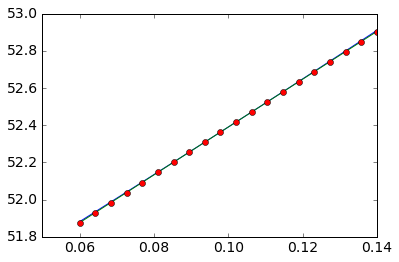

In [326]:
pert = np.linspace(-.1,.1,1000)*4e-1
plt.plot(kappal_nom+pert, (q_center + pert*12.868 + .5*pert**2*sens_q2[2,2]/(kappal_nom**2)))
plt.plot(kappal_nom+pert, (q_center + pert*12.868 + 0*pert**2*sens_q2[2,2]/.1**2))
#run some examples
runs= 20
new_pert = np.linspace(-.1,.1,runs)*4e-1
vals = np.zeros(runs)
for i in range(runs):
    sol,q_new = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), 
                                 vs,                       
                                 kappa_func(xs, kappal_nom+new_pert[i], kappah_nom)) 
    vals[i] = q_new
plt.plot(kappal_nom+new_pert,vals,"o")
plt.show()

#make output
output = np.vstack([new_pert,vals,q_center + new_pert*12.868 + .5*new_pert**2*sens_q2[2,2]/(kappal_nom**2),q_center + new_pert*12.868 ]).transpose()
np.savetxt('sens_adr2_kappal.csv', np.real(output), delimiter=',')


In [284]:
de = 1e-4
sol,q_new = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), 
                                 vs,                       
                                 kappa_func(xs, kappal_nom, kappah_nom+de)) 
sol,q_new2 = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), 
                                 vs,                       
                                 kappa_func(xs, kappal_nom, kappah_nom-de)) 
print((q_new-2*q_center+q_new2)/(de**2))

(-5.14934015428+0j)


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:101: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [298]:
#make output
output = np.vstack([new_pert,vals,q_center + new_pert*17.761 + 0.5*new_pert**2*sens_q2[3,3]/4,q_center + new_pert*17.761]).transpose()
np.savetxt('sens_adr2_kappah.csv', np.real(output), delimiter=',')


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:101: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:12: ComplexWarning: Casting complex values to real discards the imaginary part


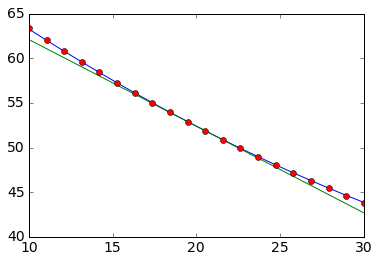

In [329]:
pert = np.linspace(-2,2,1000)*5e0
plt.plot(20+pert, (q_center + pert*-.97020 + .5*pert**2*sens_q2[1,1]/400))
plt.plot(20+pert, (q_center + pert*-.97020 + 0*pert**2*sens_q2[1,1]/4))
#run some examples
runs= 20
new_pert = np.linspace(-2,2,runs)*5e0
vals = np.zeros(runs)
for i in range(runs):
    sol,q_new = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom+new_pert[i]), 
                                 vs,                       
                                 kappa_func(xs, kappal_nom, kappah_nom)) 
    vals[i] = q_new
plt.plot(20+new_pert,vals,"o")
plt.show()

In [1]:
#make output
output = np.vstack([new_pert,vals,q_center + new_pert*-.97020 + 0.5*new_pert**2*sens_q2[1,1]/400,q_center + new_pert*-.97020 + 0*0.5*new_pert**2*sens_q2[1,1]/400]).transpose()
np.savetxt('sens_adr2_omega.csv', np.real(output), delimiter=',')


NameError: name 'np' is not defined

# LHS For Second-Derivs

In [134]:
tests = 32
lhd = lhs(5, samples=tests, criterion="corr", iterations=10000)*2-1
#run some examples
runs= tests
vals = np.zeros(runs)
sol,Q = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), 
                  vs, kappa_func(xs, kappal_nom, kappah_nom))
fact = 1e-1
for i in range(runs):
    sol,q_new = ADRSource(Lx, Nx, Source_func(xs, q_nom*(1+lhd[i,4]*fact)), omega_func(xs, omega_nom*(1+lhd[i,1]*fact)), 
                                 vs*(1+lhd[i,0]*fact),                       
                                 kappa_func(xs, kappal_nom*(1+lhd[i,2]*fact), kappah_nom*(1+lhd[i,3]*fact))) 
    vals[i] = q_new

new candidate solution found with max,abs corrcoef = 0.9917679821389841
new candidate solution found with max,abs corrcoef = 0.9876050390255159


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:96: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:13: ComplexWarning: Casting complex values to real discards the imaginary part


In [135]:
#print(lhd)
output = np.vstack([(lhd[:,0]*fact),(lhd[:,1]*fact),(lhd[:,2]*fact),(lhd[:,3]*fact),(lhd[:,4]*fact)]).transpose()
np.savetxt('regX_2nd.csv', np.real(output), delimiter=',')
np.savetxt("Q_2nd.csv",np.real(vals-Q), delimiter=",")

In [137]:
tests = 20
lhd = lhs(5, samples=tests, criterion="corr", iterations=10000)*2-1
#run some examples
runs= tests
vals = np.zeros(runs)
sol,Q = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), 
                  vs, kappa_func(xs, kappal_nom, kappah_nom))
fact = 1e-1
for i in range(runs):
    sol,q_new = ADRSource(Lx, Nx, Source_func(xs, q_nom*(1+lhd[i,4]*fact)), omega_func(xs, omega_nom*(1+lhd[i,1]*fact)), 
                                 vs*(1+lhd[i,0]*fact),                       
                                 kappa_func(xs, kappal_nom*(1+lhd[i,2]*fact), kappah_nom*(1+lhd[i,3]*fact))) 
    vals[i] = q_new

new candidate solution found with max,abs corrcoef = 0.9354959381781247


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:96: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:13: ComplexWarning: Casting complex values to real discards the imaginary part


In [138]:
#print(lhd)
output = np.vstack([(lhd[:,0]*fact),(lhd[:,1]*fact),(lhd[:,2]*fact),(lhd[:,3]*fact),(lhd[:,4]*fact)]).transpose()
np.savetxt('regX_2nd_20.csv', np.real(output), delimiter=',')
np.savetxt("Q_2nd_20.csv",np.real(vals-Q), delimiter=",")

# Adjoints

In [343]:
print(q_center)

(52.3902529277+0j)


In [389]:
def ADRSource(Lx, Nx, Source, omega, v, kappa):
    #Solves the diffusion equation with Generalized Source
    A = sparse.dia_matrix((Nx,Nx),dtype="complex")
    dx = Lx/Nx
    i2dx2 = 1.0/(dx*dx)
    #fill diagonal of A
    A.setdiag(2*i2dx2*omega + np.sign(v)*v/dx + kappa)
    #fill off diagonals of A
    A.setdiag(-i2dx2*omega[1:Nx] + 
              0.5*(1-np.sign(v[1:Nx]))*v[1:Nx]/dx,1)
    A.setdiag(-i2dx2*omega[0:(Nx-1)] - 
              0.5*(np.sign(v[0:(Nx-1)])+1)*v[0:(Nx-1)]/dx,-1)
    #solve A x = Source
    Solution = linalg.spsolve(A,Source)
    Q = np.sum(Solution*kappa*dx)#integrate.trapz(Solution*kappa,dx=dx)
    return Solution, Q

def ADRSourceAdj(Lx, Nx, Source, omega, v_in, kappa):
    #Solves the diffusion equation with Generalized Source
    A = sparse.dia_matrix((Nx,Nx),dtype="complex")
    dx = Lx/Nx
    v = -1*v_in
    i2dx2 = 1.0/(dx*dx)
    #fill diagonal of A
    A.setdiag(2*i2dx2*omega + np.sign(v)*v/dx + kappa)
    #fill off diagonals of A
    A.setdiag(-i2dx2*omega[1:Nx] + 
              0.5*(1-np.sign(v[1:Nx]))*v[1:Nx]/dx,1)
    A.setdiag(-i2dx2*omega[0:(Nx-1)] - 
              0.5*(np.sign(v[0:(Nx-1)])+1)*v[0:(Nx-1)]/dx,-1)
    #solve A x = Source
    Solution = linalg.spsolve(A,kappa)
    Q = np.sum(Solution*Source*dx)
    return Solution, Q

In [390]:
omega_nom = 20
omega_var = 0.3195214
v_nom = 10
v_var = 0.0723493
kappal_nom = 0.1
kappal_var = 8.511570e-6
kappah_nom = 2
kappah_var = 0.002778142
q_nom = 1
q_var = 7.062353e-4
Nx = 2000
Lx = 10

dx = Lx/Nx
Source_func = lambda x, q:  q*x*(10-x)
kappa_func = lambda x, kappal, kappah: kappah + (kappal-kappah)*(x>5)*(x<7.5)
v_func = lambda x,v: v*np.ones(x.size)
omega_func = lambda x,omega: omega*np.ones(x.size)

#nominal values

import csv

xs = np.linspace(dx/2,Lx-dx/2,Nx)

vs = v_func(xs, v_nom)
delta = 1e-6
sol,q_center = ADRSource(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), 
                                 vs,                       
                                 kappa_func(xs, kappal_nom, kappah_nom))  
sol_adj,q_centerAdj = ADRSourceAdj(Lx, Nx, Source_func(xs, q_nom), omega_func(xs, omega_nom), 
                                 vs,                       
                                 kappa_func(xs, kappal_nom, kappah_nom)) 

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:101: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [391]:
print(q_centerAdj)
print(q_center)

(52.3903954692+0j)
(52.3903954692+0j)


sensitivity of v

In [413]:
sens_adj = np.zeros(5)
dudx = np.zeros(Nx)
dx = Lx/Nx
dudx[1:(Nx)] = (sol[1:Nx] - sol[0:(Nx-1)])/(dx)
#dudx[Nx-1] = (0-sol[Nx-2])/(2*dx)
dudx[0] = (sol[0]-0)/(dx)
sens_adj[0] = np.sum(-dudx*sol_adj*dx)
print(sens_adj[0])

-1.74049052049


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:7: ComplexWarning: Casting complex values to real discards the imaginary part


sensitivity of omega

In [414]:
dudx2 = np.zeros(Nx)
dx = Lx/Nx
dudx2[1:(Nx-1)] = (sol[2:Nx] - 2*sol[1:(Nx-1)]+sol[0:(Nx-2)])/(dx**2)
dudx2[Nx-1] = (0-2*sol[Nx-1]+sol[Nx-2])/(dx**2)
dudx2[0] = (sol[1]-2*sol[0]+0)/(dx**2)
sens_adj[1] = np.sum(dudx2*sol_adj*dx)
print(sens_adj[1])

-0.970207772262


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:6: ComplexWarning: Casting complex values to real discards the imaginary part


sensitivity to kappa_l

In [415]:
low_area = lambda x: (x>5)*(x<7.5)
sens_adj[2] = np.sum(dx*sol[low_area(xs)]*(1-sol_adj[low_area(xs)]))
print(sens_adj[2])

12.862742303


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


In [416]:

sens_adj[3] = np.sum(dx*sol[-low_area(xs)]*(1-sol_adj[-low_area(xs)]))
print(sens_adj[3])

17.7613932101


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:2: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


In [417]:
sens_adj[4] = np.sum(dx*(xs*(10-xs))*sol_adj)
print(sens_adj)

[ -1.74049052  -0.97020777  12.8627423   17.76139321  52.39039547]


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


# RP Adjoint

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


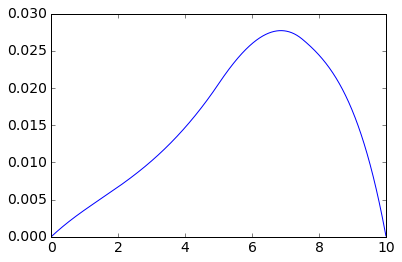

In [435]:
kappa_sens = np.zeros(Nx)
for i in range(Nx):
    kappa_sens[i] = sol[i]*(1-sol_adj[i])*dx
plt.plot(xs,kappa_sens)